1. Explain the overall purpose of the package.
2. Explain the use of the “Simple random data” and “Permutations” functions.
3. Explain the use and purpose of at least five “Distributions” functions.
4. Explain the use of seeds in generating pseudorandom numbers.

Numpy documentation https://docs.scipy.org/doc/numpy-1.16.0/reference/routines.random.html

Mersenne Twister - PRNG (pseudorandom number generator) https://en.wikipedia.org/wiki/Mersenne_Twister


In [2]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt

## Simple Random Data
At its most basic, numpy.random is used to generate random numbers or arrays of numbers. There are several functions within this package that create such simple random data and each one does so in different ways, across various distributions. 

### rand and randn
The numpy.random.rand and numpy.random.randn fuctions each generates a random number or array of numbers from uniform and normal distributions respectively. 

The function rand produces a number or array between 0 and 1 from a unifrom distribution, meaning that every number in this range has an equal chance of being generated as any other. The histogram below demonstrates the distribution across 10000 randomly generated numbers.

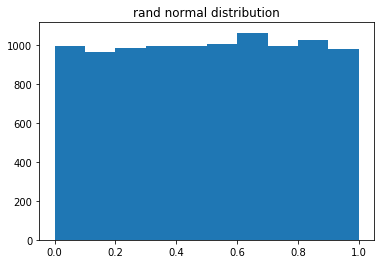

In [44]:
# demonstrating the uniform distribution of the rand function
x = np.random.rand(10000)
plt.hist(x)
plt.title("rand normal distribution")
plt.show()

On the other hand, the randn fuction generates a random number or array from a normal Gaussian distribution with a mean of 0 and a variance of 1. This means that the majority of numbers generated are between -1 and 1 and center largely around 0. The graph below helps to illustrate this; of the 1000 numbers generated, well over half are within the -1 to 1 range and peak at the 0 mark.

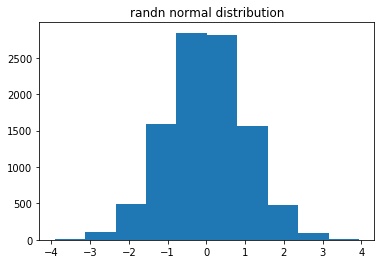

In [45]:
# demonstrating the normal distribution of the randn function
x = np.random.randn(10000)
plt.hist(x)
plt.title("randn normal distribution")
plt.show()

Despite working with different probability distributions, rand and randn function in the same way. Without any arguments, they will produce a single randomly generated number from their assigned distribution:

In [37]:
print("\033[1m" + "rand:" + "\033[0m")
print(np.random.rand())
print()
print("\033[1m" + "randn:" + "\033[0m")
print(np.random.randn())

rand:
0.20939642202662978

randn:
-0.006394432848852018


If arguments are passed, the functions create arrays of randomly generated numbers. There is no limit on the number of arguments that can be entered, so very complex arrays of arrays are achievable. 

In [38]:
print("\033[1m" + "rand:" + "\033[0m")
print(np.random.rand(5))
print()
print("\033[1m" + "randn:" + "\033[0m")
print(np.random.randn(2, 3, 4))

rand:
[0.92080809 0.41120426 0.358275   0.8774071  0.0853532 ]

randn:
[[[ 1.4077543  -0.60279047 -0.5997842   0.68466444]
  [-0.64941214  1.76124049 -1.03321857 -2.04618225]
  [-0.13473022 -0.33204155  0.36771662 -0.31673656]]

 [[-1.23843813 -0.02458405  1.33880504 -0.34235032]
  [-0.5555702  -1.09530766 -0.91968863 -0.79213568]
  [ 0.83168975  0.58367345 -0.34190004  0.71711555]]]


As mentioned previously, these functions each have a built-in range from which numbers are generated: rand produces numbers between 0 and 1 and the numbers of randn center around a mean of 0. While it is not possible to alter this range within the function arguments, it can be scaled up by multiplying by twice the desired value and then subtracting the desired value (https://www.youtube.com/watch?v=Kh9vsy6t_9c)- <b>may not be the best way and is rand only</b> So for example, if you want the range to be between -5 and 5, you would multipl by 10 and then subtract 5: 

In [49]:
10 * np.random.rand(2) - 5

array([2.62535746, 0.17763059])

### randint
Returns randomly generated integers of a given range. This function will not work if there are no arguments passed.
If only one argument is passed, the range runs from 0 up to but not including that number, making it a half-open interval. The code below will return a number from 0 - 9 inclusive.

In [83]:
np.random.randint(10)

3

### Why use numpy.random instead of built-in random.random?
While random.random by default produces single random numbers, it can produce multiple if used with the range function. However, numpy.random allows you to produce increasingly complex arrays of random numbers. https://realpython.com/python-random/#prngs-for-arrays-numpyrandom

According to Python for Data Analysis (p. 118) numpy.random supplements the random module with a few extra probability distributions and functions
https://stackoverflow.com/questions/7029993/differences-between-numpy-random-and-random-random-in-python